# Introduction

In this notebook we'll learn how to use NumPy to work with numerical data.

<img src="https://i.imgur.com/dZ1XE9o.png" width=400>

NumPy is one of THE most important libraries when it comes to science, engineering and computation in general. It has been used in various breakthroughs like:
1. First image of black hole: NumPy, SciPy, matplotlib...
2. Proving Einstein's gravitational waves theory
and more...

Pandas is built on top of NumPy and offers more high level manipulation, while NumPy generally deals with lower level computations and mathematics.

Today's learning goals:
1. Learn about NumPy ndarrays, and individual values/subsets inside the nd-arrays
2. Broadcasting with ndarrays, linear algebra with NumPy
3. Generate points to plot on chart, manipulate images as ndarrays

Given:
import statements, array setups(initialization), example image

# Import Statements

In [87]:
import numpy as np

import matplotlib.pyplot as plt
from scipy import misc # contains an image of a racoon!
from PIL import Image # for reading image files

'np' is the conventional alias for numpy.

# Understanding NumPy's ndarray

NumPy's most amazing feature is the **powerful** ndarray.

<img src="https://i.imgur.com/1IUqnxX.png" width=200>

ndarray is a homogenous n-dimensional array object, meaning all its elements are of the same type, and that we can work with an arbitrary number of dimensions(n). It is homogenous, unlike python's list and pandas dataframe which can be a mix of different object types.

#### 1-Dimensional Arrays (Vectors)

In [2]:
new_vector = np.array([2.4, 5.6, 9.23, 0.17, 6.69])
new_vector.shape

(5,)

We can see that the array is one dimensional from the shape, we can also use another attribute called ndim

In [3]:
new_vector.ndim

1

In order to access an element in the array, the process is similar to accessing a list in standard python

In [4]:
new_vector[2]

np.float64(9.23)

We can see that the result is shown as a numpy float and not a python float. But in the course solution, this same command gives a normal float instead. Maybe just a colab thing?

 #### 2-Dimensional Arrays (Matrices)

In [6]:
array_2d = np.array([[1, 2, 3, 9],
                     [5, 6, 7, 8]])

This given array has two dimensions: two rows and four columns. These dimensions are referred as axes in NumPy lingo. So first axis has length 2 and second has 4. We can look at its stats:

In [8]:
print('Shape of the 2D array:', array_2d.shape)
print('Number of dimensions of the 2D array:', array_2d.ndim)
print(f'The array has {array_2d.shape[0]} rows and {array_2d.shape[1]} columns')
print(array_2d)

Shape of the 2D array: (2, 4)
Number of dimensions of the 2D array: 2
The array has 2 rows and 4 columns
[[1 2 3 9]
 [5 6 7 8]]


The accessing of a single element is a bit different but nonetheless intuitive. We can also select a subset with normal python operations.

In [9]:
print(array_2d[1,3]) # Row 1 Col 3 i.e. 8
array_2d[1, :] # print entire row 1

8


array([5, 6, 7, 8])

#### N-Dimensional Arrays (Tensors)

**Challenge**:
* How many dimensions does the array below have?
* What is its shape (i.e., how many elements are along each axis)?
* Try to access the value `18` in the last line of code.
* Try to retrieve a 1 dimensional vector with the values `[97, 0, 27, 18]`
* Try to retrieve a (3,2) matrix with the values `[[ 0,  4], [ 7,  5], [ 5, 97]]`

*Hint*: You can use the `:` operator just as with Python Lists.

In [11]:
mystery_array = np.array([[[0, 1, 2, 3],
                           [4, 5, 6, 7]],

                         [[7, 86, 6, 98],
                          [5, 1, 0, 4]],

                          [[5, 36, 32, 48],
                           [97, 0, 27, 18]]])

# Note all the square brackets!

In [12]:
print(mystery_array.ndim)
print(mystery_array.shape)

3
(3, 2, 4)


So it is a 3 dimensional array with 3,2,4 elements in each of its axes. So in order to access the value 18 I will need to:

In [13]:
mystery_array[2,1,3]

np.int64(18)

Simple enough, just 1 less than the length of each axis. Now to retrieve the vector, which is at the end as well:

In [15]:
mystery_array[2,1,:]

array([97,  0, 27, 18])

We need the first element from each vector of the third dimension, but put all vectors within the second dimension together

In [16]:
mystery_array[:, :, 0]

array([[ 0,  4],
       [ 7,  5],
       [ 5, 97]])

Voila! That was pretty simple.

# NumPy Mini-Challenges

#### **Challenge 1**: Use [`.arange()`](https://numpy.org/devdocs/reference/generated/numpy.arange.html)to createa a vector `a` with values ranging from 10 to 29. You should get this:

`print(a)`

`[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]`

In [17]:
a = np.arange(10, 30) # The interval is half open
print(a)

[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]


The normal python range function returns an iterable, but this function returns a range in the NumPy array form. The stop value is mandatory, but we can give start, stop and step. It is not preferred for floating point step vlaues because of precision issues.

#### **Challenge 2**: Use Python slicing techniques on `a` to:
* Create an array containing only the last 3 values of `a`
* Create a subset with only the 4th, 5th, and 6th values
* Create a subset of `a` containing all the values except for the first 12 (i.e., `[22, 23, 24, 25, 26, 27, 28, 29]`)
* Create a subset that only contains the even numbers (i.e, every second number)

In [22]:
print(a[-3:])
print(a[3:6]) # Almost forgot this one is half open as well
print(a[12:])
print(a[0::2])

[27 28 29]
[13 14 15]
[22 23 24 25 26 27 28 29]
[10 12 14 16 18 20 22 24 26 28]


#### **Challenge 3**:Reverse the order of the values in `a`, so that the first element comes last:

`[29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13,
       12, 11, 10]`


If you need a hint, you can check out this part of the [NumPy beginner's guide](
https://numpy.org/devdocs/user/absolute_beginners.html#how-to-reverse-an-array)

In [24]:
print(a[::-1])
# After reading the docs, maybe I should do what I learned there
print(np.flip(a))

[29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10]
[29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10]


After solving the three challenges, I decided to look at the beginners guide just because, and these are the things I gathered from there:
1. NumPy(Numerical Python): Provides speed and memory efficiency for large amount of homogenous data.
2. A ndarray's size is immutable, and it must be made up of rectangles not jags (i.e. each n-1 th array making up n th array must be same shape)
3. Python slice operations create a copy when used on lists, but on arrays, they create a view. A view can be used to mutate the original array.<br> Eg. say we sliced an array a's first half into b. If we change the first element of b, the first element of a is modified as well, because it refers to the same location.
4. The term dimension and axes were disambiguated because an example array with only 2 axes (3 rows and 4 columns) can be used to represent 3 points each belonging to a 4th dimensional space.
5. We avoid using mathematical names like scalar(0D), vector(1D), matrix(2D) and tensor(N-D) because the behavior of an array is not exactly the same
6. Basic attributes: shape(tuple number of elements in each axis), ndim(number of dimensions i.e. length of shape tuple), dtype(data type of elements in an array), size(total elements in the array)
7. Array creation methods: np.zeros(n), np.ones(n), np.empty(n) will fill the array with 0, 1 or random values. np.empty(n) is faster than zeros. np.arange() to create an array with a numeric range. np.linspace(start,stop,num) will generate an array of n elements linearly spaced between start and stop.
8. We can supply a dtype parameter to specify a certain data type for our array
9. np.sort() will sort in ascending order. np.searchsorted() can be used to search from a sorted array.
10. np.concatenate(a, b) can be used to join two arrays together. We can use the axis parameter to choose when we want to concatenate in a different axis i.e. add rows instead of columns.
11. We can reshape an array using reshape() or np.reshape(), the argument is the new shape, the size for current and reshaped array must be the same
12. We can use np.newaxis to add one dimension to current array. Usage: a[np.newaxis, :] to add new row, a[:, np.newaxis] to add new column. We can also use np.expand_dims(array, axis) to achieve the effect.
13. Using filters, we can create a vector from a ndarray like a[a<10] gives all elements less than 10 in a single 1D array.
14. An assignment expression for condition i.e. exp = (a > threshold) will store a ndarray of bools in exp, evaluating the condition on each element of a
15. np.nonzero(condition) can be used to give out the indices of an array which meet the condition. The output is a tuple with each element in the tuple corresponding to an index on the axis. [0,1,2...n][0] will be index of the first element that meets the condition.
16. The result from np.nonzero can be used as an index to the array to act as a filter.
17. We can stack two arrays vertically using vstack and horizontally using hstack. We can use hsplit() to split an array by its columns, a single numeric parameter will split equally into designated parts, but multiple parameters(as a tuple) will split the array at designated column indices.
18. Most numpy functions and slicing creates a shallow copy(view) but we can use np.copy to create a deep copy, more intensive, but separates the two arrays.
20. Arithmetic operations: we can use +,-,*,/ and they will apply on individual elements for the operating arrays. We can use sum(axis) to sum an array in a designated axis, and also max() and min()
21. We can broadcast (operate an entire array with a single number, for example) by simply using array * number (in the case of multiplication). If the dimensions are not compatible, we get ValueError
22. We can simply pass python lists into np.array() to create a NumPy array.
23. We can generate random numbers using np.random.default_rng() as a base object then using .random() on it. We can also use .integers(range, size) to set a bound.
24. We can get unique values from an array using np.unique(). We can also set return_index=True so that we get an array of unique values and an array of indices. return_counts=True will return the number of occurences in the array for each as well. If we don't pass an axis argument, the array will be flattened, if we do, it will give us unique rows/columns.
25. We can use np.flip() to reverse an array, and use np.transpose() to convert rows to columns and columns to rows.
26. There are two ways to flatten an array, using flatten() and ravel(). ravel will create a view so any changes in the new array will affect the original.
27. Implementing mathematical formulae is simple with NumPy with np.sum, np.square, and array operations. np.square will work on each element individually.
28. We can save/load numpy objects from disk using np.save(filename, array) for a single ndarray into .npy file. For multiple ndarrays, we can use np.savez(). To load just use np.load('filename.npy')
29. We can save and load as plaintext/csv using np.savetxt() and np.loadtxt()
30. Numpy can easily work with libraries like pandas and matplotlib

#### **Challenge 4**: Print out all the indices of the non-zero elements in this array: [6,0,9,0,0,5,0]

In [31]:
array_with_zeros = np.array([6,0,9,0,0,5,0])
print(np.nonzero(array_with_zeros))
# I wanted to print the values but had initialized the variable as a python list instead of a NumPy array. Had to take a hint from GPT.
print(array_with_zeros[np.nonzero(array_with_zeros)])


(array([0, 2, 5]),)
[6 9 5]


I thought I was supposed to do this one step at a time, and maybe I had gone overboard with reading the entire beginner documentation, but it seems like I did the thing I was supposed to do. Let's complete these challenges before heading to the solution, comparing them all at once.

#### **Challenge 5**: Use NumPy to generate a 3x3x3 array with random numbers

Hint: Use the [`.random()` function](https://numpy.org/doc/stable/reference/random/index.html?highlight=random#module-numpy.random)

In [32]:
random_array = np.random.random(size=(3,3,3))
print(random_array)

[[[0.10305799 0.38608847 0.37221681]
  [0.22289819 0.28431851 0.24943733]
  [0.98765316 0.19989935 0.9436852 ]]

 [[0.8127176  0.87769111 0.55021317]
  [0.73903004 0.15007275 0.00151899]
  [0.16903921 0.27956021 0.00244451]]

 [[0.3556705  0.35103271 0.6590596 ]
  [0.19549232 0.25973475 0.05683657]
  [0.19946029 0.11777206 0.06355904]]]


The argument size can be used without naming it as well.

#### **Challenge 6**: Use [`.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) to create a vector `x` of size 9 with values spaced out evenly between 0 to 100 (both included).

In [33]:
x = np.linspace(0, 100, num=9) # If I set endpoint=False, it wouldn't include 100, which is not what we need
print(x)

[  0.   12.5  25.   37.5  50.   62.5  75.   87.5 100. ]


#### **Challenge 7**: Use [`.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) to create another vector `y` of size 9 with values between -3 to 3 (both included). Then plot `x` and `y` on a line chart using Matplotlib.

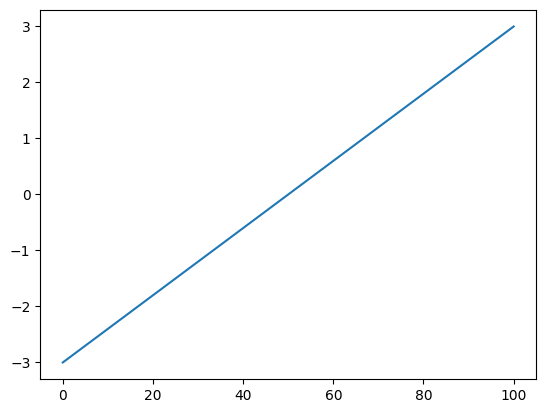

In [36]:
y = np.linspace(-3, 3, 9)
plt.plot(x, y)

Initially I had only plotted y but after looking at solution, realized I didn't read the challenge properly. Whoops

#### **Challenge 8**: Use NumPy to generate an array called `noise` with shape 128x128x3 that has random values. Then use Matplotlib's [`.imshow()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html) to display the array as an image.

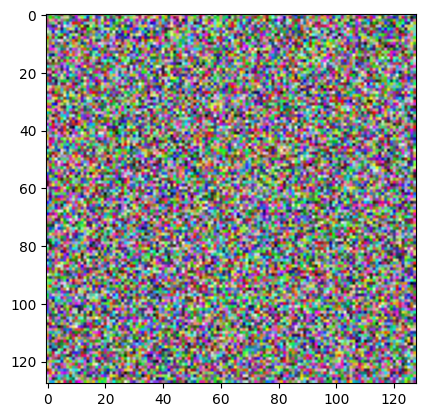

In [35]:
noise = np.random.random(size=(128,128,3)) # The 3 here as the final axis will act as the RGB selector
plt.imshow(noise)

This shows that the NumPy array can be used to hold information about an image as well.

# Linear Algebra with Vectors

In [37]:
v1 = np.array([4, 5, 2, 7])
v2 = np.array([2, 1, 3, 3])

In [38]:
# Python Lists vs ndarrays
list1 = [4, 5, 2, 7]
list2 = [2, 1, 3, 3]

Let's compare the responses of these two types in an arithmetic setting

In [40]:
print(v1+v2)
print(list1+list2)

[ 6  6  5 10]
[4, 5, 2, 7, 2, 1, 3, 3]


a NumPy array will add individual elements, while a python list will concatenate the two lists

In [42]:
print(v1*v2)
# print(list1*list2)
# Output> TypeError: can't multiply sequence by non-int of type 'list'

[ 8  5  6 21]


As we can clearly see, we can't even apply multiplication on two Python lists

# Broadcasting and Scalars


We can choose to operate a larger array with a 1D array and the 1D array would expand into the larger array's dimension. eg. array1 + 1 would add 1 to every element in array1.

Similarly, we can have two arrays that differ in a single dimension, one of them having that dimension's length=1, and an operation between them will expand the smaller array, giving an output the same size as the larger array.

In [44]:
# My own testing playground
array_a = np.arange(1,31).reshape(3,5,2)
array_b = np.arange(101, 107).reshape(3,1,2)

array_c = array_a*4
print(array_c.shape)
print(array_c)

(3, 5, 2)
[[[  4   8]
  [ 12  16]
  [ 20  24]
  [ 28  32]
  [ 36  40]]

 [[ 44  48]
  [ 52  56]
  [ 60  64]
  [ 68  72]
  [ 76  80]]

 [[ 84  88]
  [ 92  96]
  [100 104]
  [108 112]
  [116 120]]]


In [45]:
array_d = array_a * array_b
print(array_d.shape)
print(array_d)

(3, 5, 2)
[[[ 101  204]
  [ 303  408]
  [ 505  612]
  [ 707  816]
  [ 909 1020]]

 [[1133 1248]
  [1339 1456]
  [1545 1664]
  [1751 1872]
  [1957 2080]]

 [[2205 2332]
  [2415 2544]
  [2625 2756]
  [2835 2968]
  [3045 3180]]]


# Matrix Multiplication with @ and .matmul()

<img src=https://i.imgur.com/LCdhmi8.png width=350>

In [46]:
a1 = np.array([[1, 3],
               [0, 1],
               [6, 2],
               [9, 7]])

b1 = np.array([[4, 1, 3],
               [5, 8, 5]])

print(f'{a1.shape}: a has {a1.shape[0]} rows and {a1.shape[1]} columns.')
print(f'{b1.shape}: b has {b1.shape[0]} rows and {b1.shape[1]} columns.')
print('Dimensions of result: (4x2)*(2x3)=(4x3)')

(4, 2): a has 4 rows and 2 columns.
(2, 3): b has 2 rows and 3 columns.
Dimensions of result: (4x2)*(2x3)=(4x3)


**Challenge**: Let's multiply `a1` with `b1`. Looking at the wikipedia example above, work out the values for c12 and c33 on paper. Then use the [`.matmul()`](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html) function or the `@` operator to check your work.

In [47]:
np.matmul(a1,b1)

array([[19, 25, 18],
       [ 5,  8,  5],
       [34, 22, 28],
       [71, 65, 62]])

Apparently @ can be used as a shorthand for matrix multiplication on ndarrays


In [49]:
c1 = a1 @ b1
print(c1.shape)
print(c1)

(4, 3)
[[19 25 18]
 [ 5  8  5]
 [34 22 28]
 [71 65 62]]


After a shocker from the docs and some consultations with ChatGPT, I found out that matrix multiplication is only performed on the last 2 (n-2) dimensions, and anything before that is treated as a broadcastable batch multiplication.

So (X, Y, M, K) @ (X, Y, K, N) is valid and result is (X, Y, M, N) but

(X, Y, M, K) @ (Y, X, L, N) is invalid unless X=Y

We can broadcast (X, Y, M, K) @ (K, N) though

# Manipulating Images as ndarrays


In [53]:
# img = misc.face()
# Since the scipy.misc module is being deprecated, the attributes have been removed and the course instructions are not valid
# But the image is still available in scipy

from scipy import datasets
img = datasets.face()

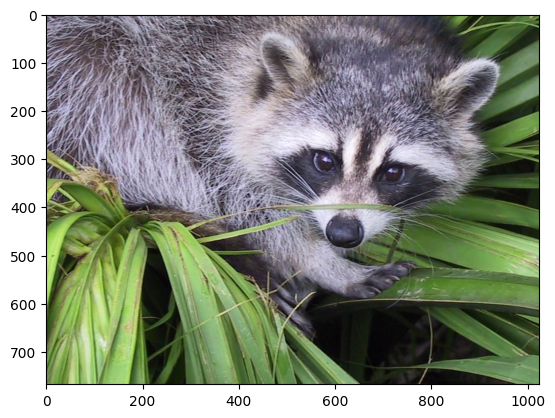

In [55]:
plt.imshow(img)

**Challenge**: What is the data type of `img`? Also, what is the shape of `img` and how many dimensions does it have? What is the resolution of the image?

In [58]:
print(img.dtype)
print(type(img))

print(img.ndim)
print(img.shape)

uint8
<class 'numpy.ndarray'>
3
(768, 1024, 3)


So the image is a ndarray, each element is of type uint8, it has 3 dimensions and its resolution is 1024*768 (reading from last to first) and has 3 color channels i.e. RGB

**Challenge**: Convert the image to black and white. The values in our `img` range from 0 to 255.
* Divide all the values by 255 to convert them to sRGB, where all the values are between 0 and 1.
* Next, multiply the sRGB array by the `grey_vals` to convert the image to grey scale.
* Finally use Matplotlib's [`.imshow()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html) together with the colormap parameter set to gray `cmap=gray` to look at the results.

In [59]:
grey_vals = np.array([0.2126, 0.7152, 0.0722])

In [68]:
img_sRGB = img / 255
grey_scale = img_sRGB @ grey_vals # This broadcasts the 3-element vector to each of the 768x1024 blocks of the 3 element vector

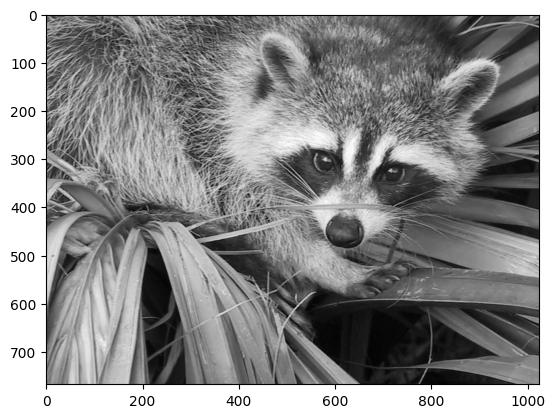

In [72]:
plt.imshow(grey_scale, cmap = 'gray')

I was worried that the image had turned out green instead of grey, but then I realized I had made it monotone at least, so I looked at the challenge instructions and it said I had to use the parameter cmap

But that wasn't the issue. I thought it was a linear multiplication so I did the normal multiply, but turns out it was supposed to be a matrix multiplication, so finally after that my image turned out grey.

I found out the result is same for both 'gray' and 'grey'. Nice

**Challenge**: Can you manipulate the images by doing some operations on the underlying ndarrays? See if you can change the values in the ndarray so that:

1) You flip the grayscale image upside down

<img src=https://i.imgur.com/r36CigD.png>

2) Rotate the colour image

<img src=https://i.imgur.com/IiNylco.png>

3) Invert (i.e., solarize) the colour image. To do this you need to converting all the pixels to their "opposite" value, so black (0) becomes white (255).

<img src=https://i.imgur.com/cfFbuex.png>

#### Challenge Solutions

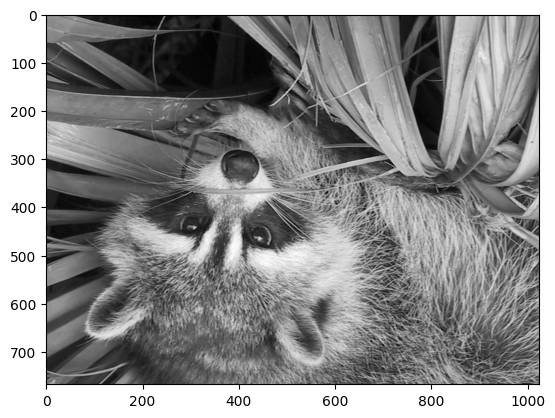

In [79]:
upside_down = np.flip(grey_scale, (1,0))
plt.imshow(upside_down, cmap='grey')

I tried transpose but forgot it doesn't flip it, just makes it sideways.

Also tried flip but forgot that there are only two axes in a greyscale image, not three. So finally used it correctly

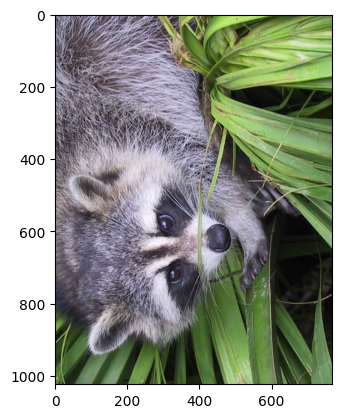

In [84]:
rotated = np.transpose(img, (1,0,2))
plt.imshow(rotated)

This time I had apparently used two axes only, so it didn't match the actual image

The course solution used no other parameters for the flipping challenge, and this time  it used np.rot90(img)

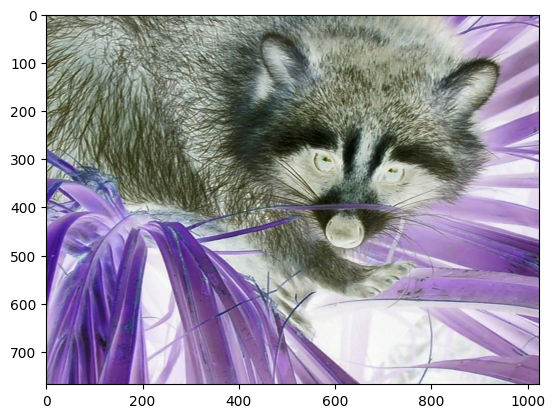

In [85]:
solarized = 255 - img
plt.imshow(solarized)

Easy!

# Use your Own Image!

In [86]:
file_name = 'yummy_macarons.jpg'

#### Use PIL to open

In [89]:
macarons = Image.open(file_name)
macarons_array = np.array(macarons)
print(macarons_array.shape)

(533, 799, 3)


Now that we know our file is 3 dimensional we can replicate the above processes here for sure. But this time the manipulation is left for us

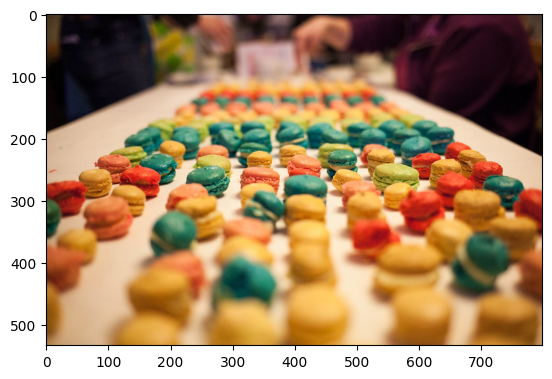

In [90]:
plt.imshow(macarons_array)

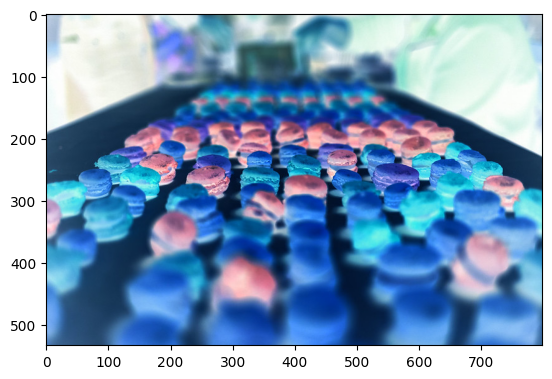

In [91]:
plt.imshow(255-macarons_array)

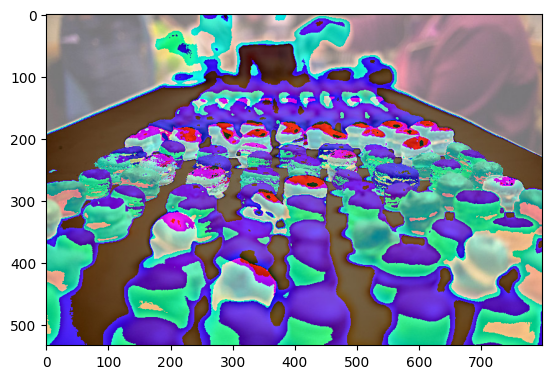

In [93]:
plt.imshow((macarons_array+120)%255)

Well let's end today's stuff at this. Nice learning experience.